In [21]:
from numpy import array, linspace
from scipy.integrate import solve_ivp
from pylab import *
import pylab
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd
# import math
import numpy as np
import pandas as pd

In [6]:
%matplotlib inline

In [3]:
%config InlineBackend.figure_format = 'retina'

In [26]:

n = 100 # size of space: n x n
p = 0.25 # probability of initially panicky individuals

def initialize():
    global config, nextconfig, panicked
    config = zeros([n, n])
    panicked = 0
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    return config, nextconfig

def observe():
    global config, nextconfig, panicked
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update(config, nextconfig):
    panicked = 0
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            if config[x,y] == 1: 
                panicked = panicked+1
    
            #print("panicked", panicked)
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config
    return config, nextconfig, panicked

time = np.array(np.arange(0,300, 1))
p_values = [0.24, 0.25, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26]

panicked_numbers = []
panicked_array =[]
for p in p_values:
 
  config, nextconfig = initialize()
  for t in time:
    config, nextconfig, panicked = update(config, nextconfig)

    panicked_number = {"p": f"P{p}", "t": t, "panicked": panicked}
    panicked_numbers.append(panicked_number)
  
   

In [28]:
panicked_numbers = pd.DataFrame(panicked_numbers)
panicked_numbers.to_csv("panic_numbers_1.csv")
panicked_numbers

,p,t,panicked
0,P0.24,0,2380
1,P0.24,1,1442
2,P0.24,2,1347
3,P0.24,3,1429
4,P0.24,4,1506
...,...,...,...
2695,P0.26,295,10000
2696,P0.26,296,10000
2697,P0.26,297,10000
2698,P0.26,298,10000


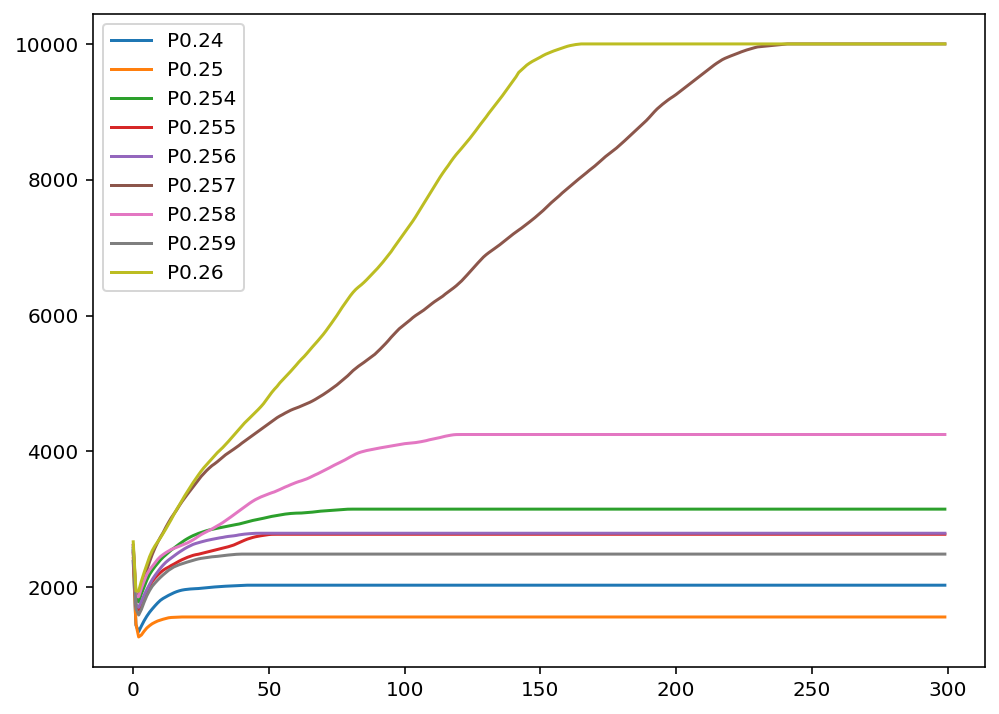

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
for key, grp in panicked_numbers.groupby(['p']):
    ax.plot(grp['t'], grp['panicked'], label=key)

ax.legend()
plt.show()